- Simple example of how to make 

In [86]:
import qrcode

# Create a QR code object
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

# Add data to the QR code
qr.add_data('https://t.me/DataMasterMind')
qr.make(fit=True)

# Create an image from the QR code object
img = qr.make_image(fill_color="black", back_color="white")

# Save the image
img.save('.QR_Codes/Ex-1-qrcode.png')


In [5]:
import qrcode
from PIL import Image

# Open the background image
img_bg = Image.open('cover_updated_1.png')

# Create a QR code object
qr = qrcode.QRCode(box_size=2)
qr.add_data('https://www.example.com')
qr.make()

# Create an image from the QR code object
img_qr = qr.make_image()

# Calculate the position to paste the QR code on the background image
pos = (img_bg.size[0] - img_qr.size[0], img_bg.size[1] - img_qr.size[1])

# Paste the QR code on the background image
img_bg.paste(img_qr, pos)

# Save the resulting image
img_bg.save('qrcode_with_background.png')


In [29]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer
from  qrcode.image.styles.colormasks import SolidFillColorMask
from PIL import Image
from PIL import Image, ImageDraw


if not hasattr(Image, 'Resampling'):
  Image.Resampling = Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.

im = Image.open('amazon-logo.png')
im = add_corners(im, 100)
im.save('amazon-logo-rounded.png')


qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.amazon.com')

qr_inner_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1),
                            color_mask=SolidFillColorMask(front_color=(255, 153, 0)))

qr_outer_eyes_img = qr.make_image(image_factory=StyledPilImage,
                            eye_drawer=RoundedModuleDrawer(radius_ratio=1))                            

qr_img = qr.make_image(image_factory=StyledPilImage,
                       module_drawer=RoundedModuleDrawer(),
                       embeded_image_path="amazon-logo-rounded.png")

inner_eye_mask = style_inner_eyes(qr_img)
outer_eye_mask = style_outer_eyes(qr_img)
intermediate_img = Image.composite(qr_inner_eyes_img, qr_img, inner_eye_mask)
final_image = Image.composite(qr_outer_eyes_img, intermediate_img, outer_eye_mask)
#final_image.save("final_qr_code.png")
# final_image.show()

In [31]:
final_image.show()

In [7]:
pip uninstall PIL
pip install --upgrade Pillow


SyntaxError: invalid syntax (2437746294.py, line 1)

In [32]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer
from qrcode.image.styles.colormasks import SolidFillColorMask
from PIL import Image

# Open and round the logo image
im = Image.open('amazon-logo.png')
im = add_corners(im, 100)
im.save('amazon-logo-rounded.png')

# Create a QR code instance
qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)
qr.add_data('http://www.amazon.com')

# Generate the styled inner eye image
qr_inner_eyes_img = qr.make_image(
    image_factory=StyledPilImage,
    eye_drawer=RoundedModuleDrawer(radius_ratio=1),
    color_mask=SolidFillColorMask(front_color=(255, 153, 0))
)

# Generate the styled outer eye image
qr_outer_eyes_img = qr.make_image(
    image_factory=StyledPilImage,
    eye_drawer=RoundedModuleDrawer(radius_ratio=1)
)

# Generate the QR code image with the embedded logo
qr_img = qr.make_image(
    image_factory=StyledPilImage,
    module_drawer=RoundedModuleDrawer(),
    embedded_image_path="amazon-logo-rounded.png"
)

# Calculate masks for inner and outer eyes
inner_eye_mask = style_inner_eyes(qr_img)  # Make sure this function is correctly defined
outer_eye_mask = style_outer_eyes(qr_img)  # Make sure this function is correctly defined

# Composite the images
intermediate_img = Image.composite(qr_inner_eyes_img, qr_img, inner_eye_mask)
final_image = Image.composite(qr_outer_eyes_img, intermediate_img, outer_eye_mask)

# Save and display the final image
final_image.save("final_qr_code.png")
final_image.show()


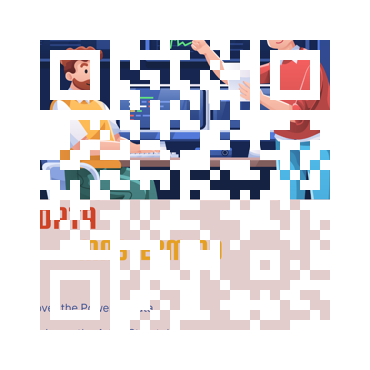

In [38]:
import qrcode
import PIL
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import SquareModuleDrawer, RoundedModuleDrawer

from  qrcode.image.styles.colormasks import ImageColorMask
from PIL import Image, ImageDraw

if not hasattr(Image, 'Resampling'):
  Image.Resampling =Image
# Now PIL.Image.Resampling.BICUBIC is always recognized.


qr = qrcode.QRCode(version=1,error_correction=qrcode.constants.ERROR_CORRECT_H)

qr.add_data('http://www.medium.com')
                         

qr_img = qr.make_image(image_factory=StyledPilImage,
                       color_mask=ImageColorMask(color_mask_path='cover_updated_1.png'))

# qr_img.save('example_assets/my-colormask-qrcode.png')
qr_img

In [56]:
final_image.show()

In [59]:
import qrcode
from PIL import Image

# Open and resize the logo image
logo_path = 'cover_updated_1.png'
logo = Image.open(logo_path)
logo = logo.resize((100, 100))  # Resize the logo as needed

# Create a QR code instance
qr = qrcode.QRCode(
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

# Add data to the QR code
data = 'http://www.medium.com'
qr.add_data(data)
qr.make(fit=True)

# Generate the QR code image
qr_code_img = qr.make_image(fill_color="black", back_color="white")

# Calculate the position to overlay the logo in the center
qr_width, qr_height = qr_code_img.size
logo_width, logo_height = logo.size
position = ((qr_width - logo_width) // 2, (qr_height - logo_height) // 2)

# Paste the logo onto the QR code
qr_code_img.paste(logo, position)

# Save the final QR code with the logo
output_path = 'qr_code_with_logo.png'
qr_code_img.save(output_path)

print("QR code with logo generated and saved as", output_path)


QR code with logo generated and saved as qr_code_with_logo.png


In [68]:
import qrcode
from PIL import Image

# Open and resize the logo image
logo_path = 'cover_updated_1.png'
logo = Image.open(logo_path)
logo = logo.resize((100, 100))  # Resize the logo as needed

# Create a QR code instance
qr = qrcode.QRCode(
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

# Add data to the QR code
data = 'http://www.medium.com'
qr.add_data(data)
qr.make(fit=True)

# Generate the QR code image
qr_code_img = qr.make_image(fill_color="white", back_color="navy")

# Calculate the position to overlay the logo in the center
qr_width, qr_height = qr_code_img.size
logo_width, logo_height = logo.size
position = ((qr_width - logo_width) // 2, (qr_height - logo_height) // 2)

# Paste the logo onto the QR code with transparency
qr_code_img.paste(logo, position, logo)

# Save the final QR code with the logo
output_path = 'qr_code_with_logo.png'
qr_code_img.save(output_path)

print("QR code with logo generated and saved as", output_path)


QR code with logo generated and saved as qr_code_with_logo.png


In [81]:
import qrcode
from PIL import Image, ImageChops, ImageEnhance

# Open and resize the logo image
logo_path = 'cover_updated_1.png'
logo = Image.open(logo_path)
logo = logo.resize((100, 100))  # Resize the logo as needed

# Create a QR code instance
qr = qrcode.QRCode(
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

# Add data to the QR code
data = 'http://www.medium.com'
qr.add_data(data)
qr.make(fit=True)

# Generate the QR code image
qr_code_img = qr.make_image(fill_color="white", back_color="black")

# Create a gradient background
gradient = Image.new('RGB', qr_code_img.size, (17, 13, 53))  # Gradient color

# Blend the QR code image with the gradient background
blended_image = ImageChops.blend(gradient, qr_code_img, alpha=0.5)  # Adjust alpha value

# Adjust the transparency of the logo
logo_with_transparency = logo.copy()
enhancer = ImageEnhance.Brightness(logo_with_transparency)
logo_with_transparency = enhancer.enhance(0.7)  # Adjust transparency

# Calculate the position to overlay the logo in the center
qr_width, qr_height = qr_code_img.size
logo_width, logo_height = logo_with_transparency.size
position = ((qr_width - logo_width) // 2, (qr_height - logo_height) // 2)

# Paste the logo onto the blended image
blended_image.paste(logo_with_transparency, position, logo_with_transparency)

# Save the final QR code with the logo and custom style
output_path = 'custom_styled_qr_code.png'
blended_image.save(output_path)

print("Custom styled QR code generated and saved as", output_path)


Custom styled QR code generated and saved as custom_styled_qr_code.png
